<a href="https://colab.research.google.com/github/rungdung/game-aids-for-the-elderly/blob/main/training-notebooks/train-yolov8-trails-on-roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training dice detection with YOLO

---

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.





## GPU check

In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [5]:
!nvidia-smi

Tue Feb 21 09:19:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [3]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.



## Training

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="zpT4bMUtjQVSjThWOuzx")
project = rf.workspace("gameaids").project("dice-tj9ae")
dataset = project.version(3).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to dice-3 in yolov8:: 100%|██████████| 344/344 [00:00<00:00, 945.31it/s] 


## Custom Training

In [18]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.yaml data={dataset.location}/data.yaml epochs=60 imgsz=640

/content

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv             

In [19]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch180.jpg
events.out.tfevents.1676971258.2722488cb04f.1409.0  train_batch181.jpg
F1_curve.png					    train_batch182.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


/content


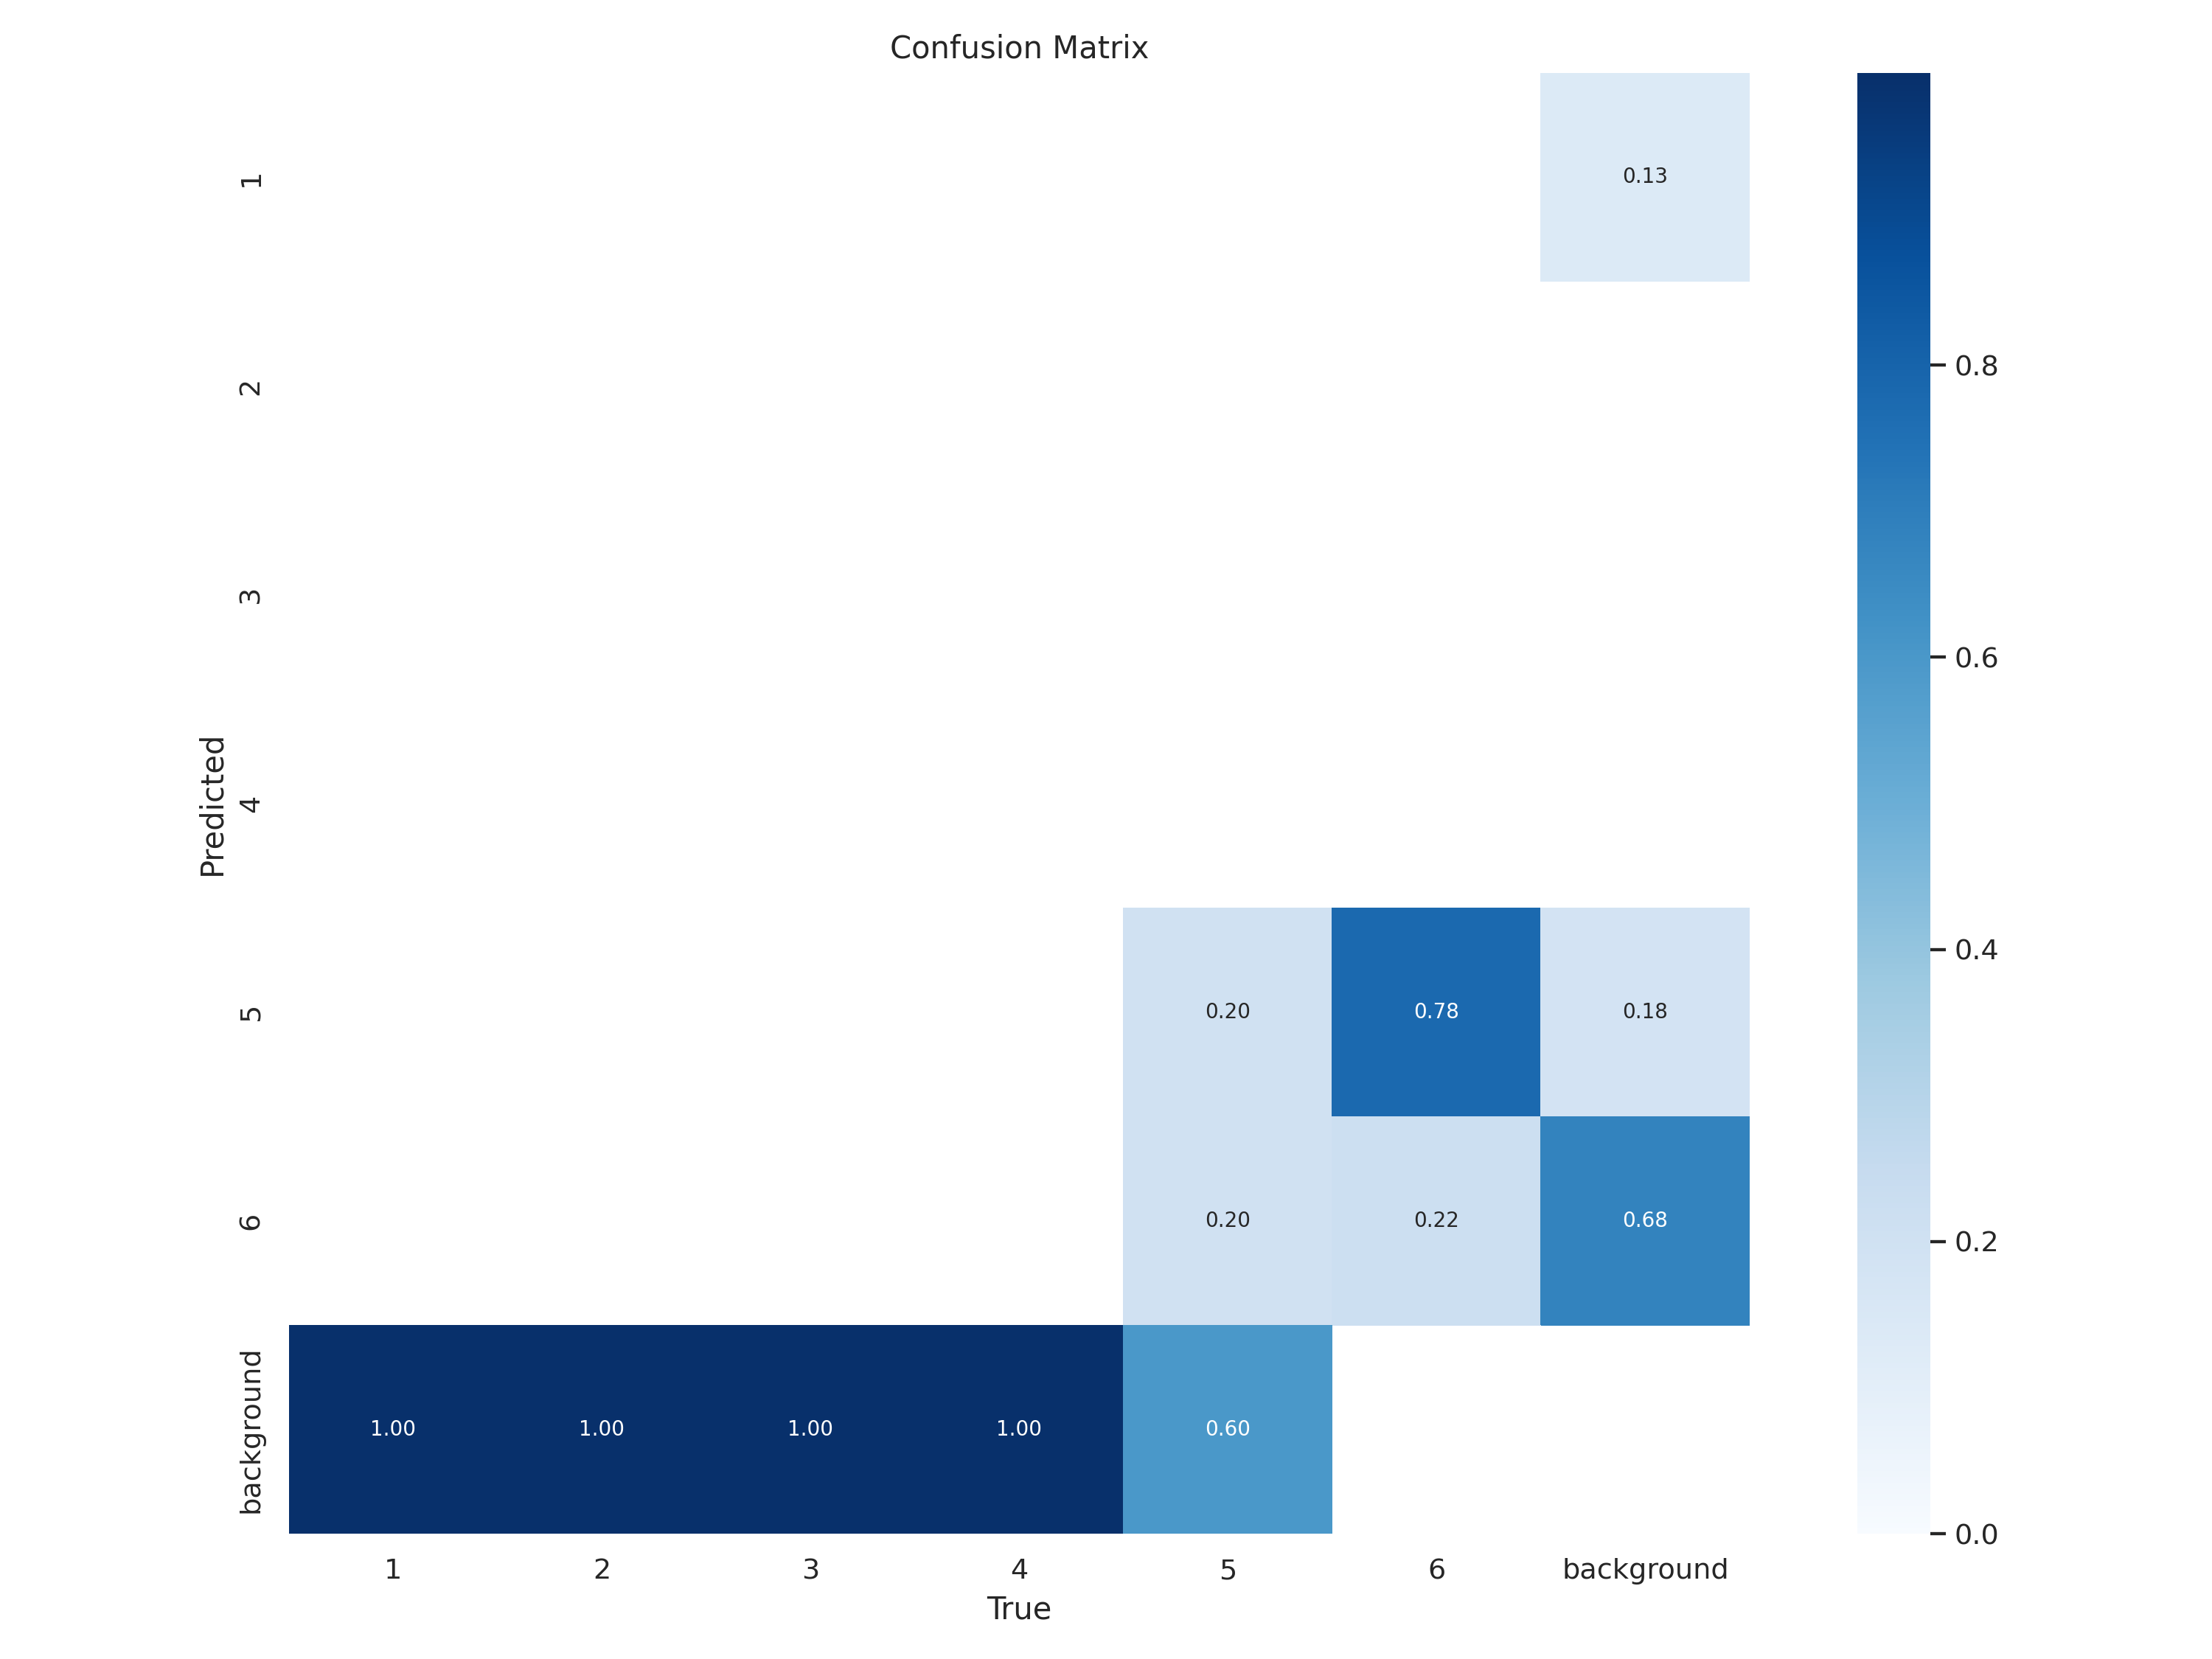

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


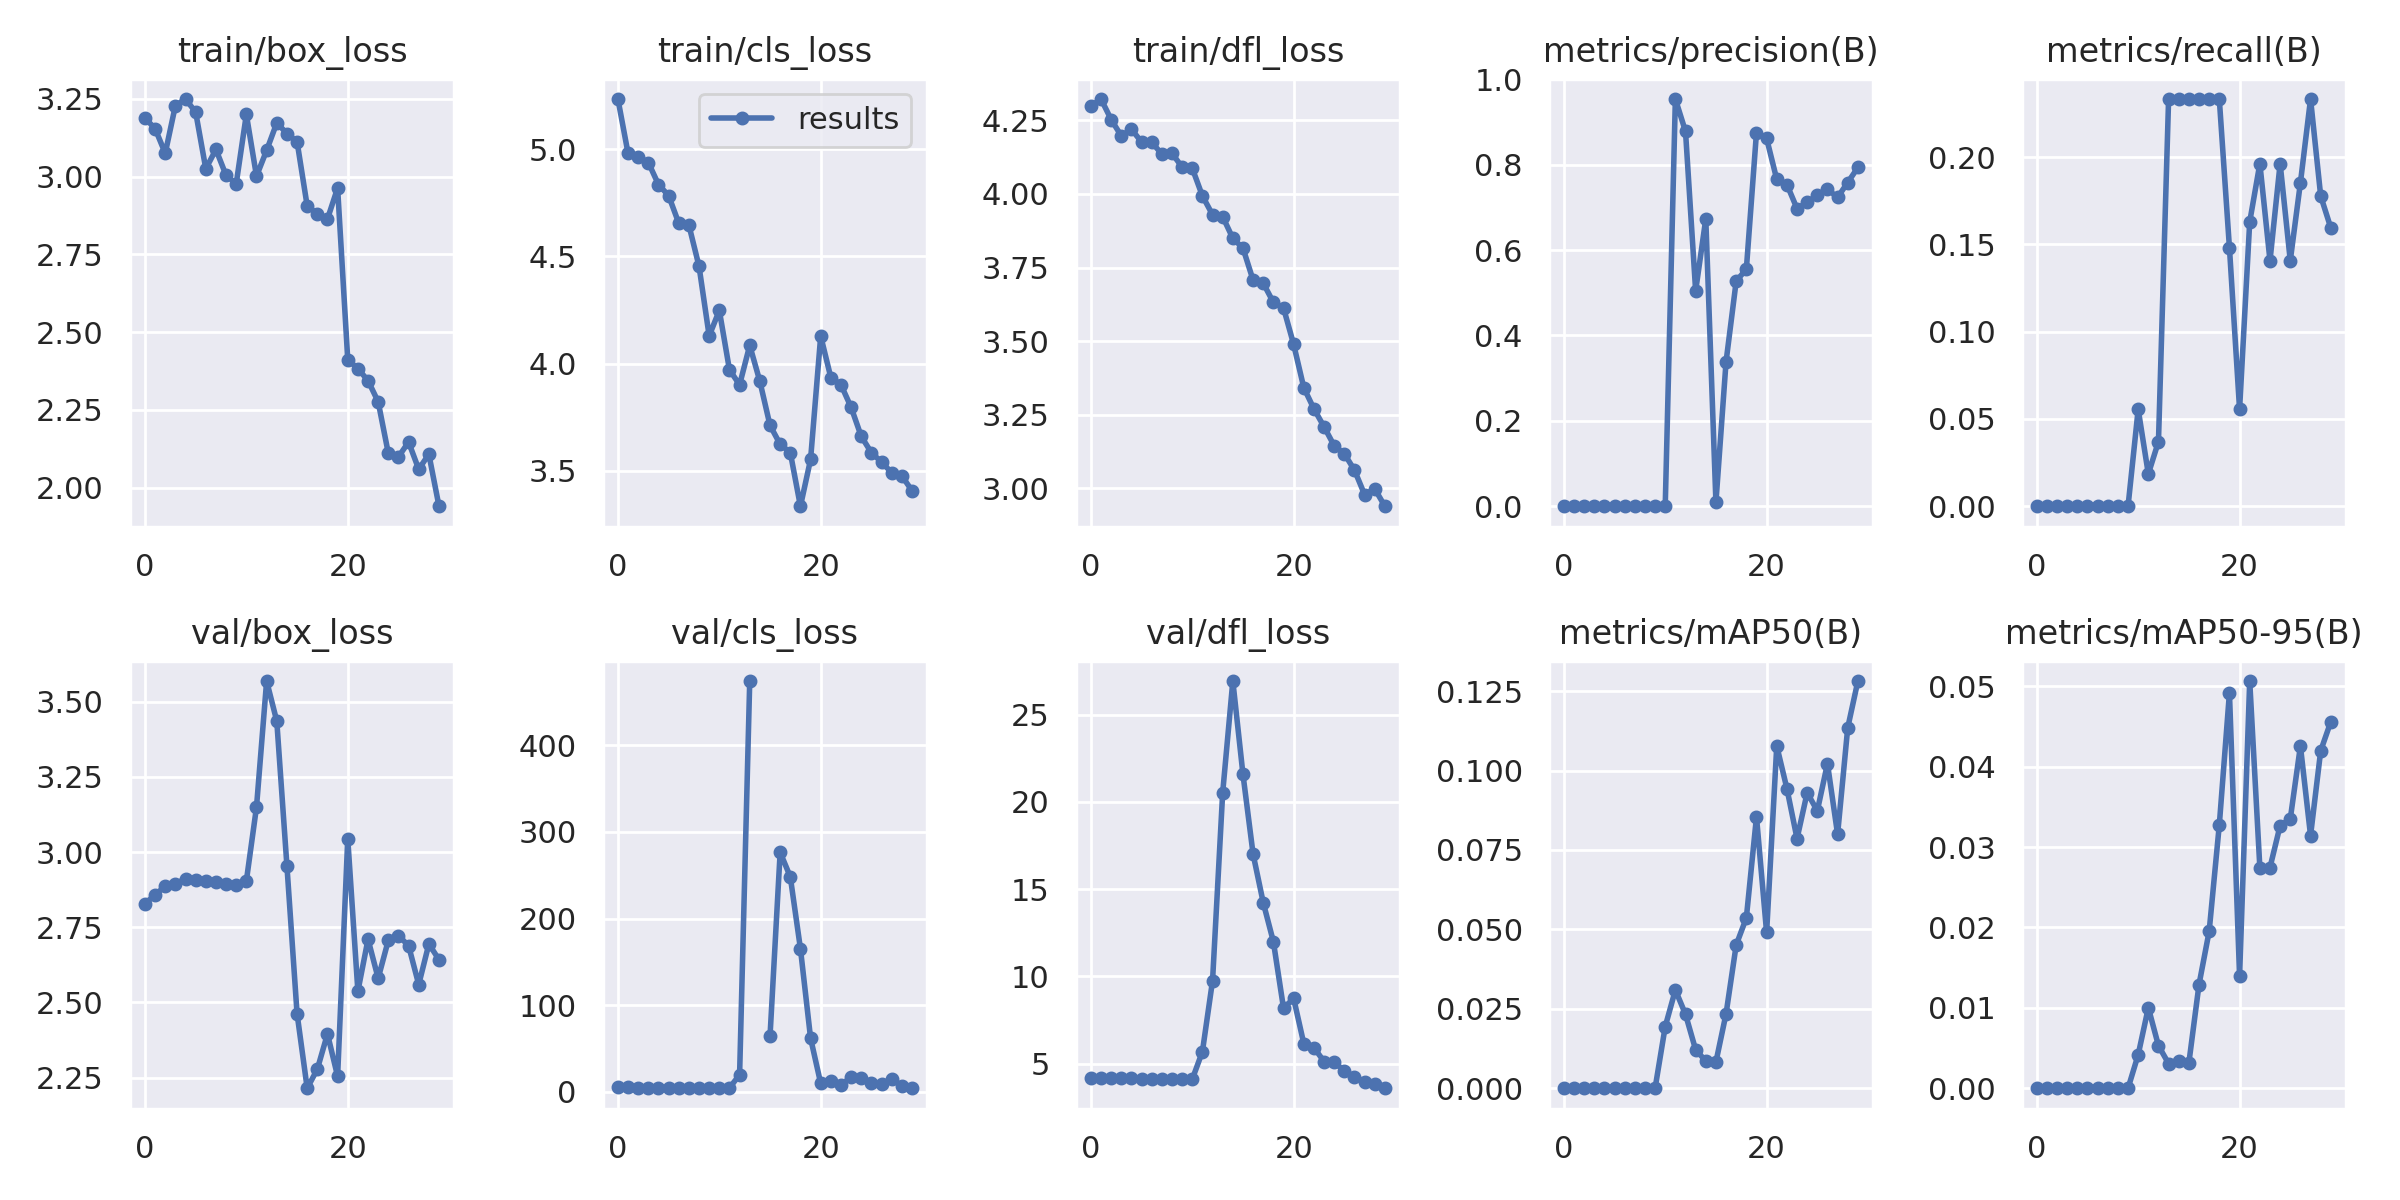

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


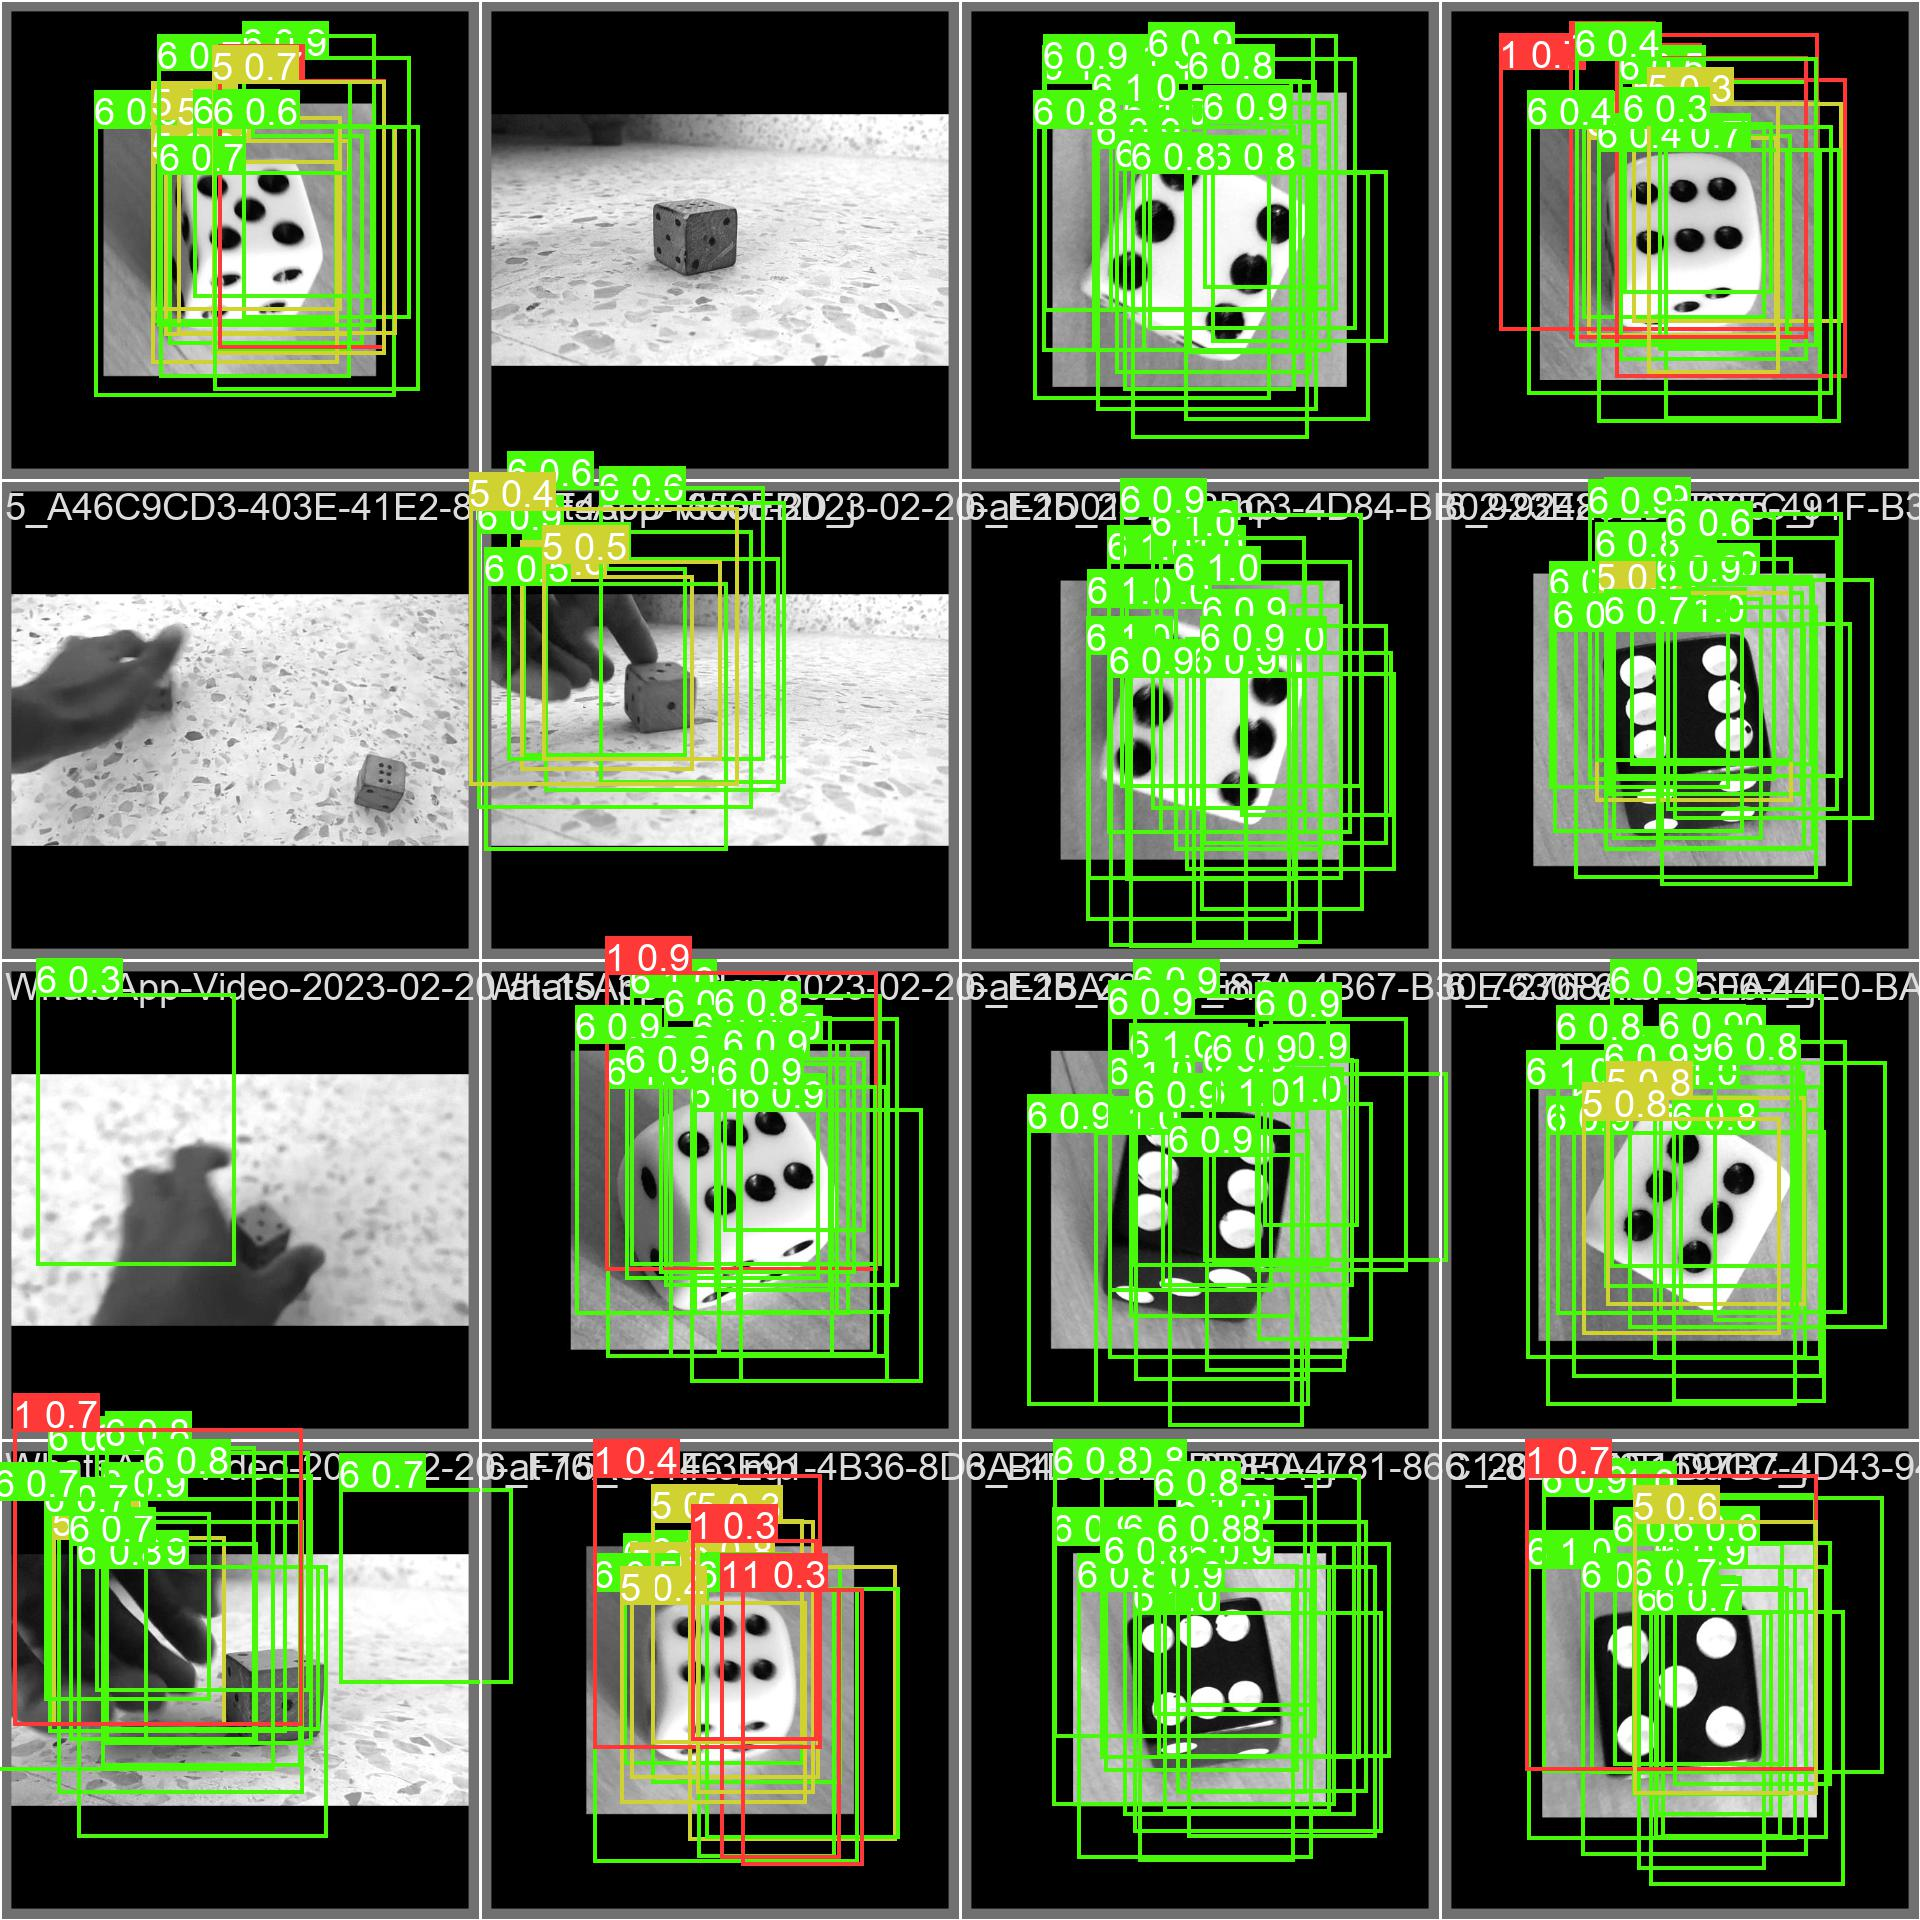

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/dice-3/valid/labels.cache... 18 images, 1 backgrounds, 0 corrupt: 100% 18/18 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8, len(boxes) = 20. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.80it/s]
                   all         18         20      0.766      0.163      0.111     0.0513
                     1         18          2          1          0          0          0
                     2         18          1          1          0          0          0
                     3         18    

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

image 1/10 /content/datasets/dice-3/test/images/6_13DC130B-7E3A-46B0-98F7-6EF61CD9C07F_jpg.rf.c398757c7f5f05f5fed8d8d4d8d4560e.jpg: 640x640 8.1ms
image 2/10 /content/datasets/dice-3/test/images/6_2078B822-1719-42A3-8459-AA943CAB4AE2_jpg.rf.68d19cd988f6d23518f0cc47ab7d077b.jpg: 640x640 8.0ms
image 3/10 /content/datasets/dice-3/test/images/6_4FC2D0FC-58A1-4366-9144-716AF9489863_jpg.rf.11ce8a25fcd2c5bd76d249fa77e47670.jpg: 640x640 7.9ms
image 4/10 /content/datasets/dice-3/test/images/6_776273A0-612A-4B1B-8538-15086A94C3CD_jpg.rf.e239d450dd7ed7aa3bbc33af6851dc9d.jpg: 640x640 8.2ms
image 5/10 /content/datasets/dice-3/test/images/6_C61FBEB1-B7AF-4015-80FE-6AF8D001F40D_jpg.rf.2bace4ef331353545cc73118af7099ff.jpg: 640x640 8.0ms
image 6/10 /content/datasets/dice-3/test/images/6_D68642C2-2CA4-4E27-AC23-CF68729B3787_jpg.r

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")